**`K-nearest neighbors algorithm`** is a `supervised machine learning algorithm` that can be used to solve both `classification` and `regression` problems. 

Recall that the algorithm that the `supervised machine learning algorithm` relies on `labeled input` data to learn a function that produces an appropriate output when given `new unlabeled data` while the `unsupervised machine learning algorithm` makes use of input data without any labels

- 1) For example, a flower shop wants to guess a customer's purchase from similarity to most recent purchase; which flower is a customer most likely to purchase based on similarity to previous purchase? This problems is an simple example for `classification problem`

- 2) A `regression problem` has a real number (a number with a decimal point) as its output. For example, we could use the data in the given observations to estimate someone’s weight given their height. We have an `independent variable` (or set of independent variables) and a `dependent variable` (the thing we are trying to guess given our independent variables). For instance, we could say `height` is the `independent` variable and `weight` is the `dependent` variable.

(-0.5, 1953.5, 1254.5, -0.5)

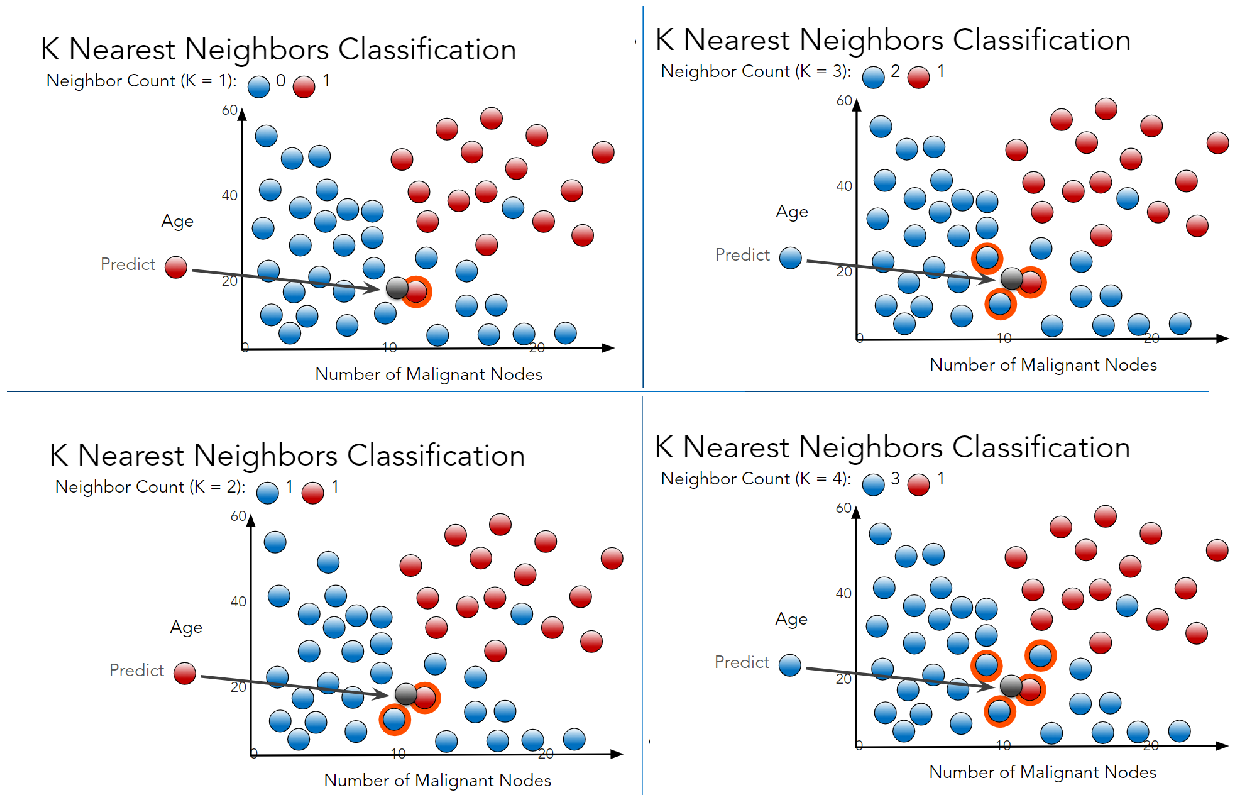

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r"illustration_knn.png")
plt.figure(figsize = (22, 16))
plt.imshow(image)
plt.axis('off')

**Detail algorithm.**
- Step 1. import the modules and load the dataset
- Step 2. Initialize K to your chosen number of neighbors; then `for each example in the data`
- - 2.1.Calculate the distance between the query example and the current example from the data.
- - 2.2. Add the distance and the index of the example to an ordered collection
- Step 3. Sort the ordered collection of distances `d(x, y)` and indices from smallest to largest (in ascending order) by the distances! 
- Step 4. Select the `nearest` neighbor (Pick the first K entries from the sorted collection then get the labels of the selected K entries)
- Step 5. 
- - 5.1. If the problem is `classification` : return the `mode` of the K labels
- - 5.2. If the problem is `regression` : return the mean of the K labels

**Comments.** During the training process, this algorithm didn't learn anything from the dataset (hence; we also called it is `lazy learning` or `Instance-based learning` or `Memory-based learning`).

In [2]:
from sklearn import neighbors

- i) `What is needed for classification?` 
- - 1) The model data with `features` (that can be quantitated) and `labels` (that are known).
- - 2) The method to measure similarity

- ii) `What is needed for selecting a k-NN model ?`
- - 1) Correct value for 'K' 
- - 2) How to measure closeness of neighbors?

Before study the `advantages & disadvantages` and `choosing the right value for K` of this algorithm; let's practice with the following examples.

**Example 1.** 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

## loading dataset
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target


print('Number of classes: %d' %len(np.unique(iris_y))) 
print( 'Number of data points: %d' %len(iris_y))

## viewing the first 5 observataions at each class; labeled {0, 1, 2}
X0 = iris_X[iris_y == 0,:]
print('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print('\nSamples from class 1:\n', X1[:5,:]) 

X2 = iris_X[iris_y == 2,:]
print('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


The first 2 columns of each class is not good to use for classification (since their distances are too small) while the last 2 columns is not! Now, use `train_test_split` to split into the training & testing dataset.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 50, random_state = 15)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


`Basic syntax:` KNeighborsClassifier(n_neighbors = 1, p = 2)

where
- n_neighbors (int) – Number of neighbors to use.
- window_size (int) – Size of the sliding window use to search neighbors with.
- p (int) – Power parameter for the Minkowski metric. When p=1, this corresponds to the Manhattan distance, while p=2 corresponds to the Euclidean distance.
- weighted (bool) – Whether to weight the contribution of each neighbor by it’s inverse distance or not.

In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for 20 test data points:") 
print( "Predicted labels: ", y_pred[20:40])
print("Ground truth : ", y_test[20:40])

from sklearn.metrics import accuracy_score
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Print results for 20 test data points:
Predicted labels:  [1 0 1 1 0 0 2 2 2 1 0 2 2 2 0 0 1 0 0 1]
Ground truth :  [1 0 1 1 0 0 2 2 2 1 0 2 1 2 0 0 2 0 0 1]
Accuracy of 1NN: 94.00 %


Now, we try with 10 neighbors and p = 1

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 94.00 %


In [7]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 96.00 %
Accuracy of 10NN (1/distance weights): 94.00 %


**Choosing the right value for K**

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.

Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

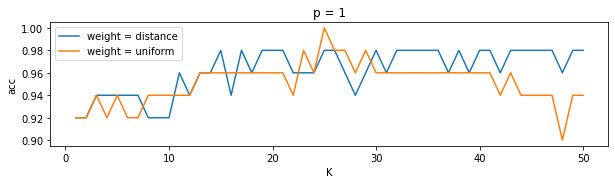

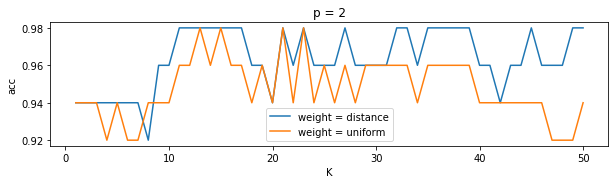

In [8]:
w_list = ['distance', 'uniform']

for p in range(1, 3):
    plt.figure(figsize = (10, 5))
    plt.subplot(2, 1, p)
    for w in w_list:
        acc = []
        for K in range(1, 51):
            clf = neighbors.KNeighborsClassifier(n_neighbors = K, p = p, weights = w)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc.append(accuracy_score(y_test, y_pred))
        plt.plot(range(1, 51), acc, label = 'weight = '+str(w))
        plt.legend()
    plt.title('p = ' + str(p))
    plt.xlabel('K')
    plt.ylabel('acc')

- In the top panel; with $p = 1$ (Manhatan distance); the `weight = distance` is almost more efficient then the `weight = uniform` for vary values $K$. But at $K = 25$, the `uniform weights` attains the highest accuracy(= 1) while the `weight = distance` can not!

- In the bottom with $p = 2$ (Euclidean distance); then the `weight = distance` is more efficient then the `weight = uniform` for all $K \in [0, 50].$

- Now, try to define the new weights; the first example in choosing weights; we use
$$ w_i = w(x_i) = \exp \left( - \dfrac{\Vert \textbf{x} - x_i \Vert^2}{2 \sigma^2} \right) $$
where $\textbf{x}$ is the `testing_data`; $x_i$ is a point in the `K-neighborhood` of $\textbf{x}$.

In [9]:
def exp_weight(distances):
    sigma = 1   ## we can choose sigma to get the better acc
    return np.exp(-distances**2/sigma)

clf = neighbors.KNeighborsClassifier(n_neighbors = 25, p = 2, weights = exp_weight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 25NN (exp weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 18NN (exp weights): 98.00 %


- Next, we use the weight by using the `new weighted geometric mean` defined as follow

In [10]:
import scipy.stats as sts
def harmonic_weights(distances):
    return np.exp(-(distances - sts.hmean(distances))**2)
    
clf = neighbors.KNeighborsClassifier(n_neighbors = 25, p = 2, weights = harmonic_weights)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 25NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 18NN (customized weights): 96.00 %


**Summary**

**Advantages.**

The algorithm is simple and easy to implement.

*There’s no need* to build a model, tune several parameters, or make additional assumptions.

The algorithm is versatile. It can be used for classification, regression, and search.

**Disadvantage.** The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

**Example 2. K-n-n combine with random forest to find the good features in the large scale dimension** 
In this section; we consider the dataset `wine`;  we want to use `KNN and random forest` for data-processing.

- Remember that comparing predictions to true labels in the test set can be understood as the unbiased performance evaluation of our model before we let it loose on the real world. In this section, we will prepare a new dataset, the Wine dataset. After we have preprocessed the dataset, we will explore different techniques for feature selection to reduce the dimensionality of a dataset. 

- The Wine dataset is another open-source dataset that is available from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Wine)

In [11]:
from sklearn import datasets
#Load dataset
wine = datasets.load_wine()
print(wine.target_names)
print(wine.data.shape)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


We have 178 `observations`; 13 `input_features` and the `target / labels` has 3 classes: 1, 2, and 3, which refer to the three different types of grape grown in the same region in Italy but derived from different wine cultivars.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) 

**`Feature Scaling`**

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

For example; assume that we have two features where one feature is measured on a scale from 1 to 10 and the second feature is measured on a scale from 1 to 100,000, respectively.. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. 

Hence, before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. We can also use `StandardScaler` or `MinMaxScaler` in this step

In [13]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(X_train)

X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

Again, it is also important to highlight that we fit the `StandardScaler` class only once—on the training data—and use those parameters to transform the test set or any new data point. 

### Selecting meaningful features.

Noting that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of `overfitting`. Recall that `overfitting` means the model fits the parameters too closely with regard to the particular observations in the training dataset, but does not generalize well to new data, and we say the model has a high variance. 

The reason for the overfitting is that our model is too complex for the given training data. Common solutions to reduce the generalization error are listed as follows: 
- • Collect more training data 
- • Introduce a penalty for complexity via regularization 
- • Choose a simpler model with fewer parameters 
- • Reduce the dimensionality of the data Collecting more training data is often not applicable

In [14]:
from sklearn.linear_model import LogisticRegression
## ‘liblinear’ and ‘saga’ also handle L1 penalty
lr = LogisticRegression(solver = "liblinear", C = 1.0, penalty = 'l1')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train)) 
print('Test accuracy:', lr.score(X_test_std, y_test)) 

Training accuracy: 1.0
Test accuracy: 1.0


Both training and test accuracies indicate that our model does a `perfect` job on `train dataset` and `nearly perfect` on the `test-set`. When we access the intercept terms via the `lr.intercept_` attribute, we can see that the array returns three values

In [15]:
lr.intercept_

array([-1.08429843, -1.11308283, -2.55256281])

Since we fit the LogisticRegression object on a multiclass dataset, it uses the ***Oneversus-Rest (OvR)*** approach by default, where the first intercept belongs to the model that fits class 1 versus class 2 and 3, the second value is the intercept of the model that fits class 2 versus class 1 and 3, and the third value is the intercept of the model that fits class 3 versus class 1 and 2:

In [16]:
lr.coef_ 

array([[ 1.42949358,  0.31024413,  0.94239549, -1.4653445 ,  0.        ,
         0.        ,  0.64146128,  0.        ,  0.        ,  0.        ,
         0.        ,  1.33460885,  2.18689319],
       [-1.47406807, -0.8349607 , -1.12284186,  0.4974914 ,  0.        ,
         0.        ,  0.15917383,  0.37240439,  0.3621419 , -1.60561005,
         1.09963882,  0.        , -2.22276955],
       [ 0.        ,  0.10698573,  0.78296254,  0.        ,  0.        ,
         0.        , -2.12148894, -0.20787398,  0.        ,  1.43873912,
        -1.00083702, -0.66203223,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:
$$ Z = \textbf{w}^T \textbf{x} = \sum_{j=1}^m x_j w_j $$

As a result of L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset. 

Now, we will vary the regularization strength and plot the regularization path—the weight coefficients of the different features for different regularization strengths:


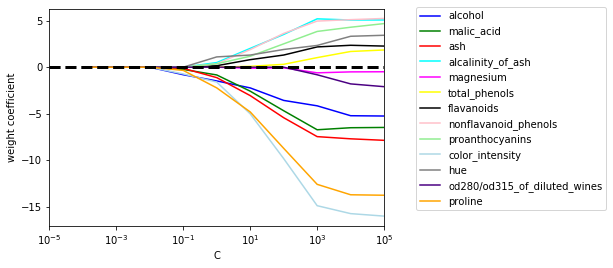

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
          'black', 'pink', 'lightgreen', 
          'lightblue', 'gray', 'indigo', 'orange'] 
weights, params = [], [] 
for c in np.arange(-4., 6.): 
    lr = LogisticRegression(penalty='l1', solver = "liblinear",
                            C=10.**c,
                            random_state=0)     
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for k in range(len(colors)): 
    plt.plot(params, weights[:, k], label = wine.feature_names[k], color=colors[k])
plt.axhline(0, color='black', linestyle='--', linewidth=3) 
plt.xlim([10**(-5), 10**5]) 
plt.ylabel('weight coefficient')
plt.xlabel('C') 
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True) 
plt.show() 

The resulting plot provides us with further insights into the behavior of `L1 regularization`. As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (`C < 0.1`); `C` is the inverse of the regularization parameter $\lambda$.

**Sequential feature selection algorithms.**
- Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k<d. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem, to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. 
- A classic sequential feature selection algorithm is ***Sequential Backward Selection (SBS)***, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.
- The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define the criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier before and after the removal of a particular feature. Then, the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding definition of SBS, we can outline the algorithm in four simple steps:
- - **Step 1.** Initialize the algorithm with $k=d$, where $d$ is the dimensionality of the full feature space $\textbf{X}^d$
- - **Step 2.** Determine the feature $x^{-}$  that maximizes the criterion $x^{-} =$ argmax $J(X_k - x)$ where $x \in X_k$.
- - **Step 3.** Remove the feature $x^{-}$ from the `feature set` : $X_{k-1} = X_k$ \ $x^{-}$
- - **Step 4.** Terminate if k equals the number of desired features; otherwise, go to **step 2**.

Let 's go ahead and implement it in Python from scratch:

In [18]:
from sklearn.base import clone 
from itertools import combinations 

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,                 
                 test_size=0.25, random_state=1):        
        self.scoring = scoring        
        self.estimator = clone(estimator)        
        self.k_features = k_features        
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size, 
                                                             random_state = self.random_state)
        dim = X_train.shape[1]        
        self.indices_ = tuple(range(dim))        
        self.subsets_ = [self.indices_]        
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)        
        self.scores_ = [score]
        while dim > self.k_features:            
            scores = []            
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):                
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)            
            dim -= 1 
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):        
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):        
        self.estimator.fit(X_train[:, indices], y_train)        
        y_pred = self.estimator.predict(X_test[:, indices])        
        score = self.scoring(y_test, y_pred)        
        return score

In the preceding implementation, we defined the k_features parameter to specify the desired number of features we want to return. 
- By default, we use the accuracy_ score from scikit-learn to evaluate the performance of a model (an estimator for classification) on the feature subsets. 
- Inside the while loop of the fit method, the feature subsets created by the itertools.combination function are evaluated and reduced until the feature subset has the desired dimensionality. 
- In each iteration, the accuracy score of the best subset is collected in a list, self.scores_, based on the internally created test dataset X_test. We will use those scores later to evaluate the results. The column indices of the final feature subset are assigned to self.indices_, which we can use via the transform method to return a new data array with the selected feature columns. Note that, instead of calculating the criterion explicitly inside the fit method, we simply removed the feature that is not contained in the best performing feature subset. 

Now, let us see our SBS implementation in action using the KNN classifier from `scikit-learn`:


In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 6)
sbs = SBS(knn, k_features = 1)

#Train the model using the training sets
sbs.fit(X_train_std, y_train)

- Although our SBS implementation already splits the dataset into a test and training dataset inside the fit function, we still fed the training dataset X_train to the algorithm. The SBS fit method will then create new training subsets for testing (validation) and training, which is why this test set is also called the validation dataset. This approach is necessary to prevent our original test set from becoming part of the training data. 
- Remember that our `SBS algorithm` *collects the scores of the best feature subset* at each stage, so let us move on to the more exciting part of our implementation and plot the classification accuracy of the KNN classifier that was calculated on the `validation dataset`.

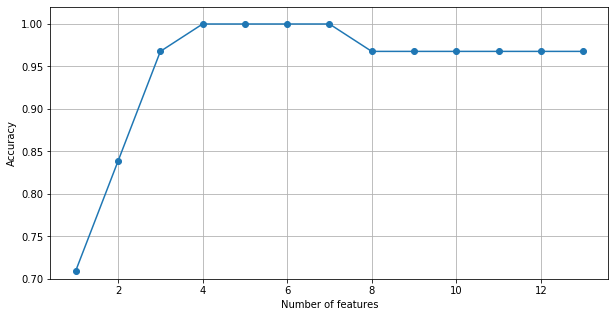

In [20]:
k_feat = [len(k) for k in sbs.subsets_]

plt.figure(figsize = (10, 5))
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02]) 
plt.ylabel('Accuracy') 
plt.xlabel('Number of features')  
plt.grid() 
plt.show()

As we can see in the following figure, *the accuracy of the KNN classifier improved on the validation dataset as we reduced the number of features*. Also,  we can see in the following plot that the classifier achieved 100 percent accuracy for k = {4, 5, 6, 7}.

To satisfy our own curiosity, let's see what the smallest feature subset (k = 4) that yielded such a good performance on the validation dataset looks like:

In [24]:
k_4 = list(sbs.subsets_[9])
for k in k_4:
    print(wine.feature_names[k]) 

alcohol
ash
alcalinity_of_ash
od280/od315_of_diluted_wines


Hence, we obtained the column indices of the `four-feature` subset from the `9th` position in the sbs.subsets_ attribute and returned the corresponding feature names from the column-index of this dataset

Next let's evaluate the performance of the `KNN classifier` on the original test set

In [25]:
knn.fit(X_train_std, y_train) 
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test)) 

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


In the preceding code section, we used the complete feature set and obtained about `96` percent accuracy on the training dataset and over `96` percent accuracy on the test, which indicates that our model already generalizes well to new data. Now, let us use the selected three-feature subset and see how well `KNN` performs:

In [26]:
knn.fit(X_train_std[:, k_4], y_train) 
print('Training accuracy:', knn.score(X_train_std[:, k_4], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k_4], y_test)) 

Training accuracy: 0.9596774193548387
Test accuracy: 0.9444444444444444


Using less than a third of the original features in the Wine dataset, the prediction accuracy on the test set declined slightly. This may indicate that those 4 features do not provide less discriminatory information than the original dataset. However, we also have to keep in mind that the Wine dataset is a small dataset, which is very susceptible to randomness—that is, the way we split the dataset into training and test subsets, and how we split the training dataset further into a training and validation subset. 

*While we did not increase the performance of the KNN model by reducing the number of features, we shrank the size of the dataset, which can be useful in real-life applications that may involve expensive data collection steps*. Also, by substantially reducing the number of features, we obtain simpler models, which are easier to interpret.

### Assessing feature importance with random forest

Another useful approach to select relevant features from a dataset is to use a `random forest`.

Using a `random forest`, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not. 

Conveniently, the random forest implementation in scikit-learn already collects the feature importance values for us so that we can access them via the feature_importances_ attribute after fitting a `RandomForestClassifier`. 

By executing the following code, we will now train a forest of 10,000 trees on the Wine dataset and rank the 13 features by their respective importance measures; and we don't need to use standardized or normalized features in tree-based models:

In [36]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = wine.feature_names  ## df_wine.columns[1:]
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): 
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) proline                        0.177474
 2) flavanoids                     0.154322
 3) alcohol                        0.140889
 4) color_intensity                0.134613
 5) od280/od315_of_diluted_wines   0.114639
 6) hue                            0.065744
 7) total_phenols                  0.056803
 8) malic_acid                     0.041470
 9) alcalinity_of_ash              0.034868
10) magnesium                      0.033428
11) ash                            0.016682
12) proanthocyanins                0.016131
13) nonflavanoid_phenols           0.012936


- After executing the code, we created a plot that ranks the different features in the Wine dataset by their relative importance; note that the feature importance values are normalized so that they sum up to 1.0 (the above figure)

- We can conclude that the first 5 features (`proline, flavanoids, alcohol, color_intensity & od280/od315_of_diluted_wines`) concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the 500 decision trees. Interestingly, 2of the top-ranked features in the plot are also in the 4-feature subset selection from the SBS algorithm that we implemented in the previous step (`alcohol` concentration and `OD280/OD315` of diluted wines).

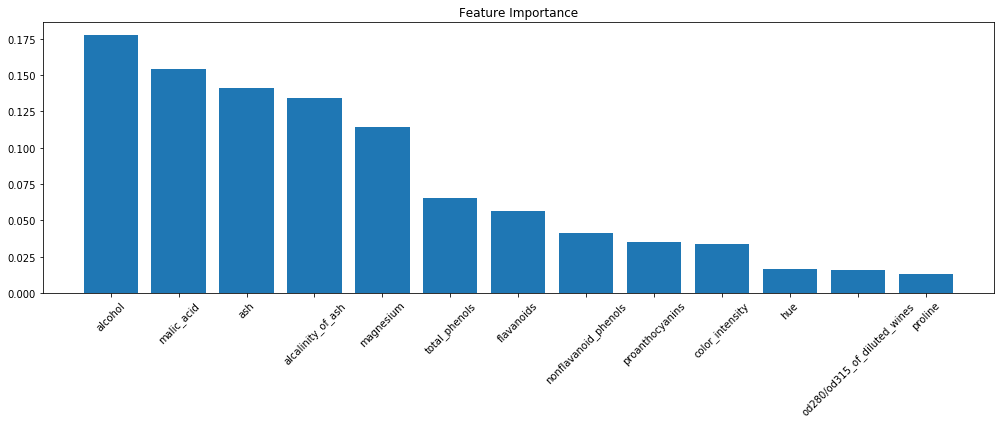

In [37]:
plt.figure(figsize = (14, 6))    
plt.title('Feature Importance') 
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation = 45) 
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

- However, as far as interpretability is concerned, the random forest technique comes with an important gotcha that is worth mentioning. ***If two or more features are highly correlated, one feature may be ranked very highly while the information of the other feature(s) may not be fully captured. On the other hand, we don't need to be concerned about this problem if we are merely interested in the predictive performance of a model rather than the interpretation of feature importance values.*** 

- To conclude this section about feature importance values and random forests, it is worth mentioning that scikit-learn also implements a SelectFromModel object that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the RandomForestClassifier as a feature selector and intermediate step in a scikit-learn Pipeline object, which allows us to connect different preprocessing steps with an estimator. For example, we could set the threshold to 0.1 to reduce the dataset to the five most important features using the following code

In [39]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold = 0.1, prefit = True) 
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,                  
                            feat_labels[indices[f]],                            
                            importances[indices[f]])) 

Number of samples that meet this criterion: 124
 1) proline                        0.177474
 2) flavanoids                     0.154322
 3) alcohol                        0.140889
 4) color_intensity                0.134613
 5) od280/od315_of_diluted_wines   0.114639


***`Thank for readings`***